In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Разминка (4 балла)

## 1.1 Создание матриц (0.25 балла)

Создайте 4 матрицы
- A - "шахматную" из нулей и единиц, размера 6 на 3, левое верхнее значение (A[0][0]) равно 1,
- В - из чисел от 1 до 24, записанных в виде змейки, размера 6 на 4,
- C - из случайных целых чисел от 2 до 10 (обе границы включительно), размера 4 на 3
- D - из нулей с единичками на главной диагонали, размера 4 на 4.

**Создайте из этих матриц "лоскутную" матрицу S**

A В

С D

используя **только стандартные** операции numpy. Comprehensions использовать нельзя.

После этого допишите к полученной матрице S матрицу F размера 10 на 2 из нулей, чтобы получилась матрица G:

S F

P.S. Когда мы говорим, что матрица имеет размер x на y, x - количество строк, y - количество столбцов.

In [ ]:
A = (np.where(np.arange(1, 19) % 2 == 1, 1, 0)).reshape((6, 3))
B = (np.arange(1, 25, 1)).reshape((6, 4))
B[1::2] = B[1::2, ::-1]
C = (np.random.choice(np.arange(2, 11, 1), 12)).reshape((4, 3))
D = np.eye(4, dtype = np.int_)

S = np.vstack((np.hstack((A, B)), np.hstack((C, D))))

F = np.zeros((10, 2), dtype = np.int_)

G = np.hstack((S, F))

array([[ 1,  0,  1,  1,  2,  3,  4,  0,  0],
       [ 0,  1,  0,  8,  7,  6,  5,  0,  0],
       [ 1,  0,  1,  9, 10, 11, 12,  0,  0],
       [ 0,  1,  0, 16, 15, 14, 13,  0,  0],
       [ 1,  0,  1, 17, 18, 19, 20,  0,  0],
       [ 0,  1,  0, 24, 23, 22, 21,  0,  0],
       [ 8,  7,  8,  1,  0,  0,  0,  0,  0],
       [ 5,  3,  8,  0,  1,  0,  0,  0,  0],
       [ 5,  5,  7,  0,  0,  1,  0,  0,  0],
       [10,  9,  9,  0,  0,  0,  1,  0,  0]])

## 1.2 Поиск ближайшего соседа (0.25 балла)

Реализуйте функцию, принимающую на вход матрицу X и некоторое число a и возвращающую ближайший к числу элемент матрицы.
Например, для X = np.arange(0,10).reshape((2, 5)) и a = 3.6 ответом будет 4. Можно пользоваться только базовыми функциями numpy, циклами пользоваться **нельзя**.

In [ ]:
def find_nearest_neighbour(X, a):
    X = X - a
    b = np.abs(X).argmin()
    X = X + a
    return X.ravel()[b]

## 1.3 Очень странная нейросеть (0.25 балла)

Реализуйте одну очень странную нейросеть. Нейросеть должна:

- Возводить матрицу A (матрицу весов) размера N x N в квадрат
- В качестве первого преобразования умножать вектор X длины N (вектор признаков) на матрицу весов A**2 (на выходе получается новый вектор);
- В качестве второго преобразования умножать вектор, полученный на прошлом шаге, на вектор b (вектор весов) размера N (на выходе получается скалярное число).

Считаем, что все числа (элементы матриц и векторов) - числа с плавающей точкой.

In [ ]:
A = np.ones(16).reshape((4, 4))
b = np.ones(4)
X = np.ones(4)

def very_strange_neural_network(A, b, X):
    A = np.dot(A, A)
    A = np.dot(X, A)
    A = np.dot(A, b)
    return A

print(very_strange_neural_network(A, b, X))

64.0


## 1.4 Джунгли зовут! (0.25 балла)

Перед вами матрица M - карта местности тяжелопроходимых джунглей, составленная Ларой Крофт. На карте каждая ячейка - целое число, обозначающее высоту над уровнем моря (если число больше нуля) в метрах или глубину моря (если число меньше нуля) в метрах в данной ячейке карты размером метр на метр. Если число 0, то это часть суши - берег.


Вам необходимо посчитать:
- Общую площадь клеточек моря, в которых его глубина больше 5 (в м^2)
- Общий объём всей воды на карте (в м^3)
- Максимальную высоту над уровнем моря, которая есть на этой карте (в м)

In [ ]:
def find_deep_sea_area(M):
    a = np.where(M < -5, 1, 0)
    return np.sum(a)

def find_water_volume(M):
    a = np.where(M < 0, M, 0)
    return np.sum(np.abs(a))

def find_max_height(M):
    return M.max()

In [ ]:
# Можно подставить свой пример
M = np.array([
    [-7, -3, -1, 0],
    [-4, -3, 1, 19],
    [-2, 0, 4, 25],
    [-1, 3, 6, 9]
])

# простая проверка для примера выше
assert np.isclose(find_deep_sea_area(M), 1)
assert np.isclose(find_water_volume(M), 21)
assert np.isclose(find_max_height(M), 25)

print("Общая площадь моря на карте -", find_deep_sea_area(M), "м^2")
print("Общий объем воды на карте -", find_water_volume(M), "м^3")
print("Максимальный уровень над уровнем моря на карте -", find_max_height(M), "м")

Общая площадь моря на карте - 1 м^2
Общий объем воды на карте - 21 м^3
Максимальный уровень над уровнем моря на карте - 25 м


## 1.5 Острова сокровищ (0.25 балла)


На вход функции подаётся массив a из нулей и единиц. Необходимо посчитать, сколько в массиве есть блоков из идущих подряд единиц (островков). Можно пользоваться только базовыми функциями numpy, циклами пользоваться **нельзя**.

Подсказка: посмотрите, что такое `np.diff`

In [ ]:
def count_all_islands(a):
    return ((np.abs(np.diff(a))).sum() + 1 + a[0]) // 2

In [ ]:
# можно подставить свой пример

a = np.array([0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1])

# простая проверка для примера выше
assert count_all_islands(a) == 4
print(count_all_islands(a))

4


## 1.6 Маскарад (0.25 балла)

На вход идёт 2-мерная матрица X, заполненная числами с плавающей точкой, и дробное число a. Нужно заменить все ячейки в матрице, которые больше, чем а, на среднее значение среди элементов матрицы Х.

**Нужно** пользоваться базовыми функциями numpy, **нельзя** пользоваться циклами.

In [ ]:
def swap_mask_for_average(X, a):
    X = np.where(X > a, X.mean(), X)
    return X

In [ ]:
# Можно подставить свой пример
M = np.array([
    [-7, -3, -1, 0],
    [-4, -3, 0, 2],
    [-2, 0, 3, 4],
    [0, 1, 3, 7]
])
a = 3

# простая проверка для примера выше
assert np.allclose(swap_mask_for_average(M, a),
                   np.array([
                       [-7, -3, -1, 0],
                       [-4, -3, 0, 2],
                       [-2, 0, 3, 0],
                       [0, 1, 3, 0]
                   ]))

swap_mask_for_average(M, a)

array([[-7., -3., -1.,  0.],
       [-4., -3.,  0.,  2.],
       [-2.,  0.,  3.,  0.],
       [ 0.,  1.,  3.,  0.]])

## 1.7 По горячим трейсам (0.25 балла)

На вход приходит квадратная матрица М, надо посчитать разницу между суммой по главной и побочной диагоналями матрицы.


Можно пользоваться только базовыми функциями numpy, циклами пользоваться **нельзя**.

Подсказка: посмотрите, что такое `np.trace`

In [ ]:
def count_trace_diff(M):
    return np.trace(M) - np.trace(M[:, ::-1])

In [ ]:
# Можно подставить свой пример
M = np.array([
    [-7, -3, -1, 0],
    [-4, -3, 1, 19],
    [-2, 0, 4, 25],
    [-1, 3, 6, 9]
])

# простая проверка для примера выше
assert np.allclose(count_trace_diff(M), 3)

count_trace_diff(M)

3

## 1.8 Царь горы (0.25 балла)

На вход приходит вектор a размера N. Необходимо при помощи сложения, конкатенации, бродкастинга получить симметричную матрицу размера 2N x 2N, у которой в середине максимальное значение, а к краям оно убывает.

Пример: a = (0, 1, 2)

Результат:

0 1 2 2 1 0 \\
1 2 3 3 2 1 \\
2 3 4 4 3 2 \\
2 3 4 4 3 2 \\
1 2 3 3 2 1 \\
0 1 2 2 1 0 \\

In [ ]:
def create_mountain(a):
    a = a.reshape((len(a), 1)) + a
    b = (a.T[:, ::-1]).T
    a = np.vstack((a, b))
    b = a[:, ::-1]
    a = np.hstack((a, b))
    return a

In [ ]:
# Можно подставить свой пример
a = np.array([0, 1, 2, 3, 4])

create_mountain(a)

array([[0, 1, 2, 3, 4, 4, 3, 2, 1, 0],
       [1, 2, 3, 4, 5, 5, 4, 3, 2, 1],
       [2, 3, 4, 5, 6, 6, 5, 4, 3, 2],
       [3, 4, 5, 6, 7, 7, 6, 5, 4, 3],
       [4, 5, 6, 7, 8, 8, 7, 6, 5, 4],
       [4, 5, 6, 7, 8, 8, 7, 6, 5, 4],
       [3, 4, 5, 6, 7, 7, 6, 5, 4, 3],
       [2, 3, 4, 5, 6, 6, 5, 4, 3, 2],
       [1, 2, 3, 4, 5, 5, 4, 3, 2, 1],
       [0, 1, 2, 3, 4, 4, 3, 2, 1, 0]])

## 1.9 Монохромная фотография 9 на 12 (0.5 балла)

На вход приходит двухмерная матрица P размера N на M, заполненная числами от 0 до 255, соответствующая некой черно-белой фотографии и натуральное число C. Необходимо из неё получить матрицу размера (N-C + 1) x (M-C+1), где каждая ячейка - среднее значение соответствующей подматрицы размера C x C. Таким образом, по сути, мы сделаем примитивное размытие изображения (и немного потеряем в его размере)

In [ ]:
def custom_blur(P, C):
    A = np.zeros((P.shape[0] - C + 1,P.shape[1] - C + 1), dtype=float)
    for i in range(P.shape[0] - C + 1):
        for j in range(P.shape[1] - C + 1):
            A[i][j] = np.mean(P[i:i+C, j:j+C])
    return A

In [ ]:
# можно подставить свой пример
P = np.arange(0, 12).reshape((3, 4))
kernel = 2

# простая проверка для примера выше
assert np.allclose(custom_blur(P, kernel),
                   np.array([[2.5, 3.5, 4.5], [6.5, 7.5, 8.5]]))
custom_blur(P, 2 )

array([[2.5, 3.5, 4.5],
       [6.5, 7.5, 8.5]])

## 1.10 Функция проверки (0.75 балла)

На вход функции поступает произвольное (>2) кортежей размеров (shape) различных матриц. Необходимо вернуть True если можно последовательно сложить эти матрицы (возможно, с помощью broadcasting), и False если нет.

In [ ]:
def check_successful_broadcast(*matrices):
    try:
        np.broadcast_shapes(*matrices)
        return True
    except ValueError:
        return False

In [ ]:
assert check_successful_broadcast((5, 6, 7), (6, 7), (1, 7))
# можно ещё потестировать на своих примерах

## 1.11 Попарные расстояния (0.75 балла)

На вход подаются матрицы A размера m x k и матрица B размера n x k. Нужно получить матрицу размера m x n, содержащую попарные евклидовы расстояния.

Можно пользоваться только базовыми функциями, нельзя пользоваться циклами, сторонними библиотеками; скорее всего, пригодится broadcasting. Авторское решение записывается **в одну строчку** в соответствии со всеми правилами кодстайла.

In [ ]:
def pairwise_distances(A, B):
    return np.sum((A.reshape(A.shape[0], 1, A.shape[1]) - B.reshape(1, B.shape[0], B.shape[1])) ** 2, axis=2) ** 0.5

In [ ]:
A = np.array([[1, 2], [2, 3], [3, 4]])
B = np.array([[1, 2], [2, 3], [3, 4], [4, 5]])

pairwise_distances(A, B)

array([[0.        , 1.41421356, 2.82842712, 4.24264069],
       [1.41421356, 0.        , 1.41421356, 2.82842712],
       [2.82842712, 1.41421356, 0.        , 1.41421356]])

Объясни принцип работы этой одной строчки. Что именно происходит в ней?

<font color='red'> ВАШ ОТВЕТ ЗДЕСЬ </font>

Мы приводим массивы к трехмерному виду, добавляя в первом случае во второе измерение 1, во втором в первое измерение, теперь они совместимы для broadcasting. Вычитаем один из другого, чтобы получить попарные разницы для координат, возводим каждую в квадрат, затем складываем вдоль последней оси, так как именно она размерности k, после берем из каждого элемента квадратный корень

# 2. Обработка данных эксперимента (3 балла)

А сейчас, дамы и господа, мы научимся использовать библиотеки для анализа данных в реальности!

**Причина появления этого раздела проста**: многие студенты ПМФ даже во втором и третьем семестрах продолжают использовать Excel, калькулятор или лист бумаги. Хочется открыть глаза на ещё один способ выполнения лабораторных с намного меньшим порогом вхождения, чем тот же Excel. Авторы надеются, что кого-то это замотивирует присмотреться к удобным библиотекам.

*Спонсор данных для раздела - blacksamorez. Без него пять счастливых семестров лаб были бы совсем не счастливыми...*

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##  2.1. Постановка задачи и данные

Предположим, у нас есть гироскоп с прицепленным к его оси грузом на рычаге (см. рисунок для быстрого понимания, а подробности можно узнать в [лабораторном практикуме](https://lib.mipt.ru/book/267519/), том 1, стр.160). Из-за наличия груза гироскоп начинает медленно [прецессировать](https://ru.wikipedia.org/wiki/%D0%9F%D1%80%D0%B5%D1%86%D0%B5%D1%81%D1%81%D0%B8%D1%8F), т.е. вращаться вокруг вертикальной оси с какой-то более-менее постоянной частотой.

Мы с вами разберём часть этой лабораторной, в основном касающуюся обработки данных и построения графиков.

<center><img src='https://drive.google.com/uc?export=view&id=1KfYQ0hKYRDhi5uk7C8lNffZBNy8NF7nu' width=600>

Изображение гироскопа с подвешенным грузом Г и рычагом С</center>

Для начала посмотрим на данные, которые любезно кто-то для нас собрал. Создайте датафрейм из [файла](https://drive.google.com/file/d/1SbLR6R16obqLewUTnX1CAAjQTrVXh2Vq/view?usp=sharing)

In [3]:
!gdown 1SbLR6R16obqLewUTnX1CAAjQTrVXh2Vq
data = pd.read_csv('/content/data_numpy_lab.csv')
data.head()
data.info()

Downloading...
From: https://drive.google.com/uc?id=1SbLR6R16obqLewUTnX1CAAjQTrVXh2Vq
To: /content/data_numpy_lab.csv
100% 876/876 [00:00<00:00, 3.27MB/s]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    30 non-null     int64  
 1   N             30 non-null     int64  
 2   t, sec        30 non-null     int64  
 3   sigma_t, sec  30 non-null     int64  
 4   mass, gramm   30 non-null     float64
 5   length, cm    30 non-null     float64
 6   phi, rad      30 non-null     float64
dtypes: float64(3), int64(4)
memory usage: 1.8 KB


## 2.2 Работа с данными

Колонки в датафрейме следующие:

N - количество полных оборотов гироскопа в эксперименте;

t, в секундах - время эксперимента;

$\sigma_t$ - погрешность измерения времени;

mass - масса груза, подвешенного к рычагу на гироскопе;

length - длина плеча вышеупомянутого рычага;

phi - угол в радианах, на который опустился рычаг за время эксперимента. Понадобится, чтобы оценить влияние силы трения в гироскопе на прецессию.

Так как физики любят оперировать величинами адекватной размерности, нужно перевести колонки с массой в килограммы, а с длиной - в метры. Затем переименуйте все колонки так, чтобы в них не осталось упоминаний о размерности - только названия физических величин.

In [4]:
data['mass, gramm'] = data['mass, gramm'] / 1000
data['length, cm'] = data['length, cm'] / 100
data.rename(columns={'t, sec': 't', 'sigma_t, sec': 'sigma_t', 'mass, gramm': 'mass', 'length, cm': 'length', 'phi, rad': 'phi'}, inplace=True)
del data['Unnamed: 0']

assert data.mass.mean() < 0.3
assert np.allclose(data.length.mean(), 1.155)
assert all(' ' not in column for column in data.columns)

data.head()

,N,t,sigma_t,mass,length,phi
0,4,268,1,0.18,1.21,0.16
1,4,264,1,0.18,1.21,0.18
2,4,275,1,0.18,1.21,0.16
3,4,263,1,0.18,1.21,0.17
4,4,267,1,0.18,1.21,0.17


Добавьте в датафрейм колонки с соответствующими именами и значениями, вычисленными по формулам:

`omega`: $\Omega = 2 \pi \cdot \frac{N}{t}$

`sigma_omega`: $\sigma_{\Omega} = \Omega / t \cdot \sigma_t$

`omega_down`: $\Omega_{down} = \varphi / t$

`sigma_down`: $\Omega_{down} \cdot \sigma_t / t$

`momentum`: $M = m \cdot g \cdot l$ (`g = 9.8 м/с^2`)

`momentum_down`: $M_{down} = m \cdot \frac{\varphi}{t^2} \cdot l^2$

`sigma_momentum`: $\sigma_{M} = M_{down} \cdot 2 \cdot \frac{\sigma_t}{t}$


In [5]:
data['omega'] = 2 * np.pi * data['N'] / data['t']
data['sigma_omega'] = data['omega'] * data['sigma_t'] / data['t']
data['omega_down'] = data['phi'] / data['t']
data['sigma_down'] = data['omega_down'] * data['sigma_t'] / data['t']
data['momentum'] = data['mass'] * data['length'] * 9.8
data['momentum_down'] = data['mass'] * data['phi'] * data['length'] * data['length'] / data['t'] / data['t']
data['sigma_momentum'] = data['momentum_down'] * data['sigma_t'] * 2 / data['t']

assert np.allclose(data.momentum_down.iloc[0], 5.892e-07)
assert np.allclose(data.sigma_omega[0:5], 3.5e-04, atol=3e-5)
assert np.allclose(data.sigma_momentum[0:5], 4.4e-09, atol=1e-9)

data


,N,t,sigma_t,mass,length,phi,omega,sigma_omega,omega_down,sigma_down,momentum,momentum_down,sigma_momentum
0,4,268,1,0.180,1.21,0.16,0.093779,0.000350,0.000597,0.000002,2.134440,5.870751e-07,4.381157e-09
1,4,264,1,0.180,1.21,0.18,0.095200,0.000361,0.000682,0.000003,2.134440,6.806250e-07,5.156250e-09
2,4,275,1,0.180,1.21,0.16,0.091392,0.000332,0.000582,0.000002,2.134440,5.575680e-07,4.055040e-09
3,4,263,1,0.180,1.21,0.17,0.095562,0.000363,0.000646,0.000002,2.134440,6.477101e-07,4.925552e-09
4,4,267,1,0.180,1.21,0.17,0.094130,0.000353,0.000637,0.000002,2.134440,6.284484e-07,4.707479e-09
5,3,235,1,0.216,1.08,0.17,0.080211,0.000341,0.000723,0.000003,2.286144,7.755583e-07,6.600496e-09
6,3,226,1,0.216,1.08,0.15,0.083405,0.000369,0.000664,0.000003,2.286144,7.399045e-07,6.547827e-09
7,3,234,1,0.216,1.08,0.16,0.080554,0.000344,0.000684,0.000003,2.286144,7.361893e-07,6.292217e-09
8,3,229,1,0.216,1.08,0.16,0.082312,0.000359,0.000699,0.000003,2.286144,7.686883e-07,6.713435e-09
9,3,230,1,0.216,1.08,0.18,0.081955,0.000356,0.000783,0.000003,2.286144,8.572709e-07,7.454530e-09


Возможно, вы уже задались вопросом, для чего так много раз повторяются эксперименты с одной и той же массой. Чтобы получить более стабильные результаты, конечно же! Посчитайте теперь средние значения колонок `omega`, `sigma_omega`, `momentum` и`momentum_down` для каждой уникальной массы.

**Подсказка:** функция groupby вам поможет. Никаких циклов!

In [6]:
grouped_data = data.groupby('mass').mean()

assert 0.273 in grouped_data.index
assert np.allclose(grouped_data.omega[0.273], 0.1433)

grouped_data

,N,t,sigma_t,length,phi,omega,sigma_omega,omega_down,sigma_down,momentum,momentum_down,sigma_momentum
mass,,,,,,,,,,,,
0.142,3.0,282.8,1.0,1.21,0.158,0.066661,0.000236,0.000559,0.000002,1.683836,4.108862e-07,2.906917e-09
0.180,4.0,267.4,1.0,1.21,0.168,0.094012,0.000352,0.000629,0.000002,2.134440,6.202853e-07,4.645096e-09
0.216,3.0,230.8,1.0,1.08,0.164,0.081687,0.000354,0.000710,0.000003,2.286144,7.755223e-07,6.721701e-09
0.273,4.0,175.4,1.0,1.22,0.164,0.143300,0.000817,0.000935,0.000005,3.263988,2.166527e-06,2.470970e-08
0.341,5.0,208.4,1.0,1.10,0.166,0.150752,0.000723,0.000797,0.000004,3.675980,1.577406e-06,1.514038e-08
0.614,6.0,203.6,1.0,1.11,0.166,0.185194,0.000910,0.000815,0.000004,6.679092,3.030996e-06,2.978946e-08


## 2.3 Простые графики и МНК

Теперь время для повторного знакомства с методом наименьших квадратов. Конечно же, мы не заставим вас писать МНК самостоятельно! <s>Мы же не звери</s>


В numpy функция [np.polyfit](https://numpy.org/devdocs/reference/generated/numpy.polyfit.html) по `x`, `y` и степени `p` вычисляет многочлен заданной степени, являющийся МНК-оценкой зависимости `y(x)`.

Функция [np.polyval](https://numpy.org/devdocs/reference/generated/numpy.polyval.html), в свою очередь, вычисляет многочлен `P(x)` по заданным коэффициентам.

Ваша задача - построить график зависимости $\Omega (M)$ угловой скорости от момента инерции. На графике должны присутствовать экспериментальные точки, а также прямая, построенная по методу наименьших квадратов. В легенду вынесите полином с записанными коэффициентами. Не забудьте подписать оси (14 шрифт), задать сетку и сделать правильный заголовок (18 шрифт)!

<center><img src='https://drive.google.com/uc?export=view&id=1xumON0195iA4HGSqvpS0FAhPGxuCdKH8' width=600>

Пример получившегося графика</center>

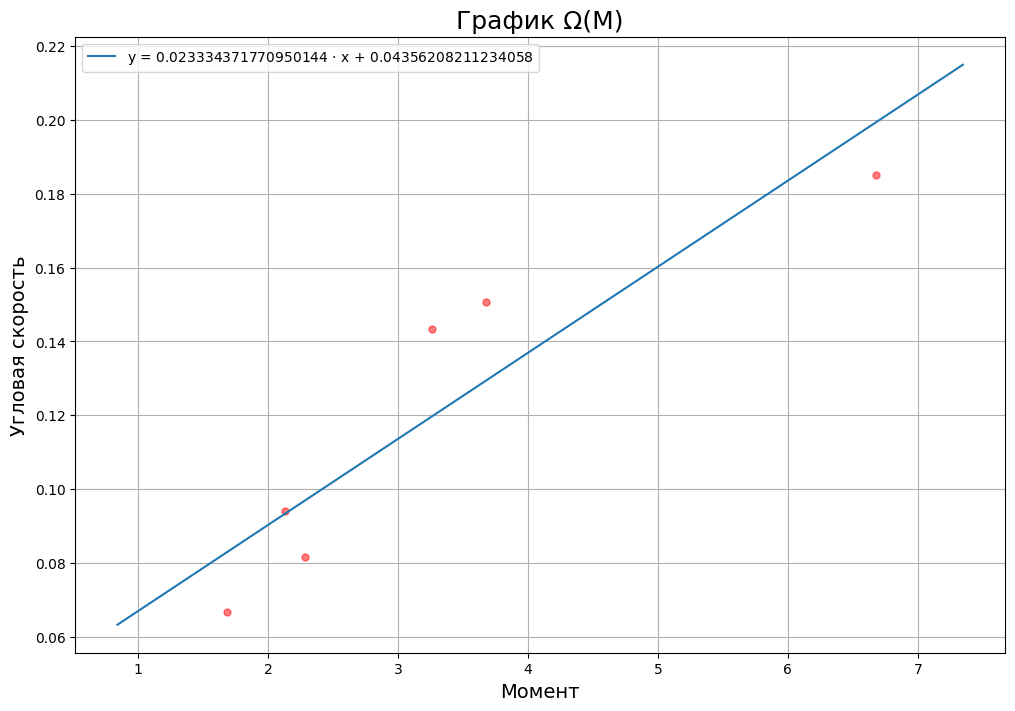

In [7]:
omega_np = np.array(grouped_data.omega)
momentum_np = np.array(grouped_data.momentum)

# Воспользуйтесь np.polyfit
coefs = np.polyfit(momentum_np, omega_np, 1)

# Чтобы прямая построилась красиво, немножко заходя за точки
x_lsq = np.linspace(momentum_np.min() * 0.5, momentum_np.max() * 1.1, 100)

# Примените np.polyval к коэффициентам и x_lsq
y_lsq = np.polyval(coefs, x_lsq)

fig = plt.figure(figsize=(12, 8))

plt.scatter(
            momentum_np, # значения оси абцисс
            omega_np, # значения оси ординат
            s=100, # scale маштаб точек
            c='red', # color цвет точек
            marker='.', # тип точки
            alpha=0.5, # прозрачность точки
            edgecolors='red', # цвет границы
           )

plt.plot(x_lsq, y_lsq, label = f"y = {coefs[0]} $\\cdot$ x + {coefs[1]}")
plt.legend()


plt.title("График Ω(M)", fontsize = 18)

plt.ylabel("Угловая скорость", fontsize=14)
plt.xlabel("Момент", fontsize=14)

plt.grid()

plt.show()

`np.polyfit` также умеет оценивать погрешности! Если точнее, он возвращает матрицу ковариаций для метода наименьших квадратов. Не будем углубляться в математику, главное знать, что на диагонали у неё стоят дисперсии полученных коэффициентов. Для получения собственно погрешности $\sigma$ необходимо взять корень из этих дисперсий.

Также стоит упомянуть про параметр `W`, задающий веса точек для оценки. Если известны ошибки $y_{error}$, можно задать веса как $W = 1 / y_{error}$, и прямая получится ещё более точной. Чтобы учесть ещё и ошибки по $x$, нужны, к сожалению, уже другие методы (но скорее всего, вам не понадобятся даже ошибки по $y$).

Представим, что произошла неприятность, и погрешности возросли в 10 раз!

In [8]:
grouped_data['sigma_down'] *= 10
grouped_data['sigma_momentum'] *= 10



Теперь вам нужно нарисовать график зависимости $\Omega_{down} (M_{down})$ <b>(не $\Omega(M)$!)</b> для точек с крестами погрешностей, а также построить не только прямую по оценке наименьших квадратов, а ещё и учесть погрешности оценок коэффициентов! Т.е. нужно построить три прямых: $k \cdot x + b$, которую выдал МНК, $(k - \sigma_k) \cdot x + (b - \sigma_b)$, $(k + \sigma_k) \cdot x + (b + \sigma_b)$, и закрасить промежуток между этими прямыми (в этом вам поможет функция plt.fill_between). Остальное оформление оставьте таким же, как в предыдущем задании.

_Примечание: часто в МНК не смотрят на погрешность $b$, оставляя только $\sigma_k$._

<center><img src='https://drive.google.com/uc?export=view&id=1SriaMzJah7F610ocIK_O1-HqqtMQgxlg' width=600>

Пример получившегося графика</center>

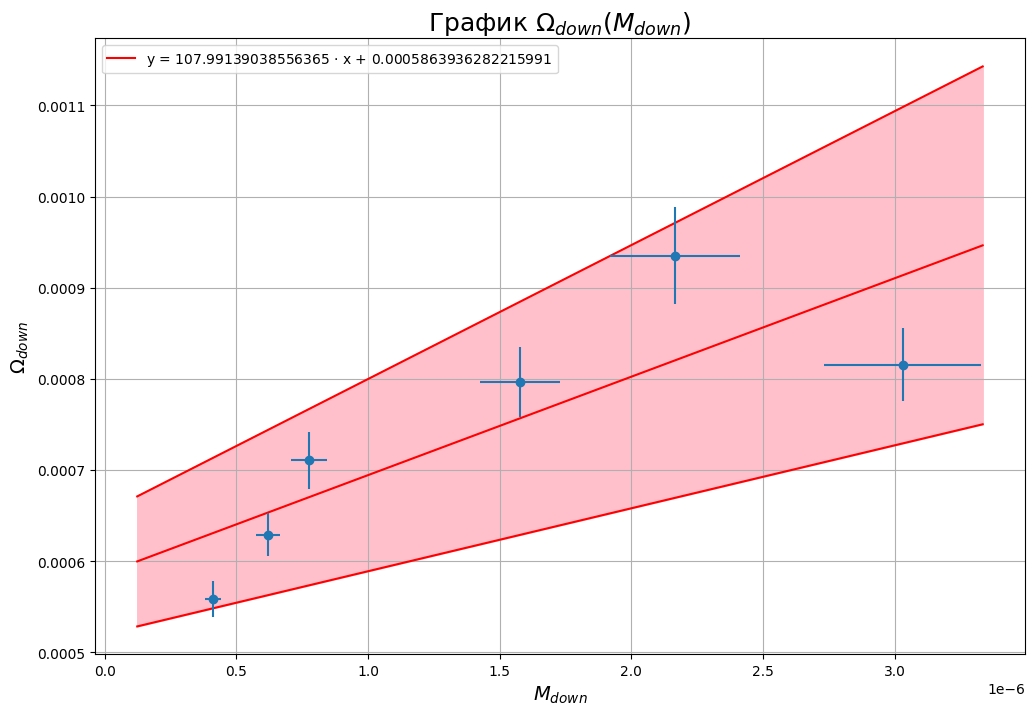

In [9]:
omega_down_np = np.array(grouped_data.omega_down)
momentum_down_np = np.array(grouped_data.momentum_down)

# Снова polyfit, но с дополнительным параметром и возвращающий ковариацию!
coefs, cov = np.polyfit(momentum_down_np, omega_down_np, 1, cov=True)

# Чтобы прямая построилась снова красиво
x_lsq = np.linspace(momentum_down_np.min() * 0.3, momentum_down_np.max() * 1.1, 100)

# Посчитайте корень диагональных элементов, должен получиться массив размером (2,)
lsq_stds = np.array([cov[0][0] ** 0.5, cov[1][1] ** 0.5]).reshape((2,))

# Знакомый polyfit, но три раза
y_lsq = np.polyval(coefs, x_lsq)
y_lsq_lower = np.polyval(coefs - lsq_stds, x_lsq)
y_lsq_upper = np.polyval(coefs + lsq_stds, x_lsq)

fig = plt.figure(figsize=(12, 8))

plt.plot(x_lsq, y_lsq, color='red', label = f"y = {coefs[0]} $\\cdot$ x + {coefs[1]}")
plt.plot(x_lsq, y_lsq_lower, color='red')
plt.plot(x_lsq, y_lsq_upper, color='red')

plt.fill_between(x_lsq, y_lsq_lower, y_lsq_upper, color='pink')

plt.scatter(
            momentum_down_np, # значения оси абцисс
            omega_down_np, # значения оси ординат
            s=100, # scale маштаб точек
            c='blue', # color цвет точек
            marker='.', # тип точки
            alpha=0.5, # прозрачность точки
            edgecolors='blue', # цвет границы
           )
plt.errorbar(momentum_down_np, omega_down_np, grouped_data['sigma_down'], grouped_data['sigma_momentum'], fmt='o')
# вот здесь можно сделать sigma_momentum разделить на 2 и получить такой же рисунок, как выше

plt.legend()


plt.title("График $Ω_{down}(M_{down})$", fontsize = 18)

plt.ylabel("$Ω_{down}$", fontsize=14)
plt.xlabel("$M_{down}$", fontsize=14)

plt.grid()
plt.show()

# 3. Работа с датасетом (3 балла)

Датасет ирисов использовался в статье Р.А. Фишера 1936 года «Использование множественных измерений в таксономических задачах», а в наши дни часто используется начинающими аналитиками данных.

В наборе данных включены три вида ирисов по 50 образцов каждый, а также некоторые свойства каждого цветка. Один вид цветка линейно отделим от двух других, но два других не отделимы линейно друг от друга.

Столбцы в этом датасете:

Идентификатор (Id) \\
Длина чашелистика, см (SepalLengthCm) \\
Ширина чашелистика, см (SepalWidthCm) \\
Длина лепестка, см (PetalLengthCm) \\
Ширина лепестка, см (PetalWidthCm) \\
Вид (Species) \\

<font color='red'>ВНИМАНИЕ!</font> Все графики в этой части должны быть подписаны, а на осях должны быть подписи на русском языке.

In [11]:
sns.set_style("darkgrid")

In [12]:
# Считайте csv в DataFrame pandas при помощи pd.read_csv
iris = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv')
# У меня сразу нет колонке id и названия немного не те, и в колонке species названия не начинаются со слова iris
iris['id'] = np.arange(150)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,id
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,2
3,4.6,3.1,1.5,0.2,setosa,3
4,5.0,3.6,1.4,0.2,setosa,4


In [13]:
# Понятно, что колонка Id нам не очень нужна
# Поэтому давайте её удалим - HINT: используйте метод drop
iris.drop('id', axis = 1, inplace = True)
iris.rename(columns={'sepal_length': 'SepalLengthCm', 'sepal_width': 'SepalWidthCm', 'petal_length': 'PetalLengthCm', 'petal_width': 'PetalWidthCm', 'species': 'Species'}, inplace=True)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Давайте проверим, сколько у нас разных видов ирисов в итоге - должно быть 3 по 50 штук каждый. Воспользуйтесь `value_counts` , чтобы посмотреть, какие есть возможные значения у колонки species.

In [14]:
iris.value_counts('Species')

,count
Species,
setosa,50
versicolor,50
virginica,50


## 3.1 Графики длины и ширины лепестка ириса

Давайте попробуем сравнить, связаны ли ширина и длина лепестков - воспользуйтесь `sns.scatterplot`, чтобы отобразить на оси OXY значения. Не забудьте подписать график и оси!

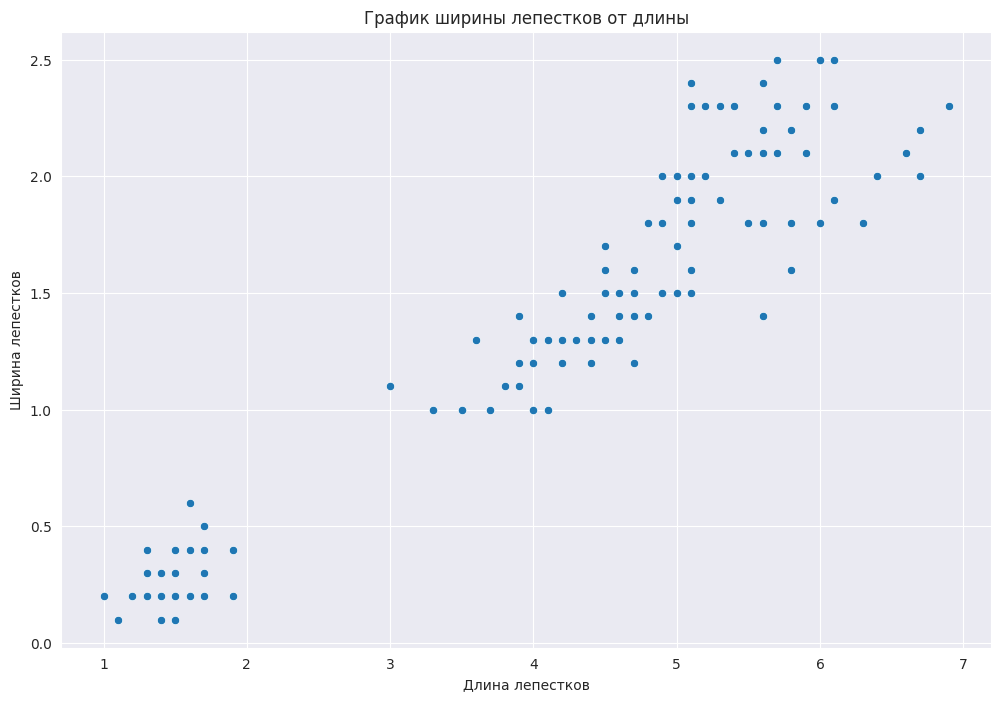

In [23]:
fig = plt.figure(figsize=(12, 8))
sns.scatterplot(x = 'PetalLengthCm', y = 'PetalWidthCm', data = iris)
plt.xlabel('Длина лепестков')
plt.ylabel('Ширина лепестков')
plt.title('График ширины лепестков от длины')

plt.show()

Напишите, какие выводы можно сделать из графика. Чего графику не хватает, чтобы он был информативным?

<font color='red'>ВАШ ОТВЕТ ЗДЕСЬ</font>

Можно сделать вывод, что с увеличением длины лепестка увеличивается его ширина, недостаточно наглядности для разных видов iris

Давайте попробуем другие графики для тех же целей из библиотеки seaborn - `sns.jointplot`; кроме того, попробуйте выделить цветом точки на графике в зависимости от вида ириса - воспользуйтесь `sns.facetgrid`. В следующих ячейках выведите эти два графика и проанализируйте.

<Figure size 1200x800 with 0 Axes>

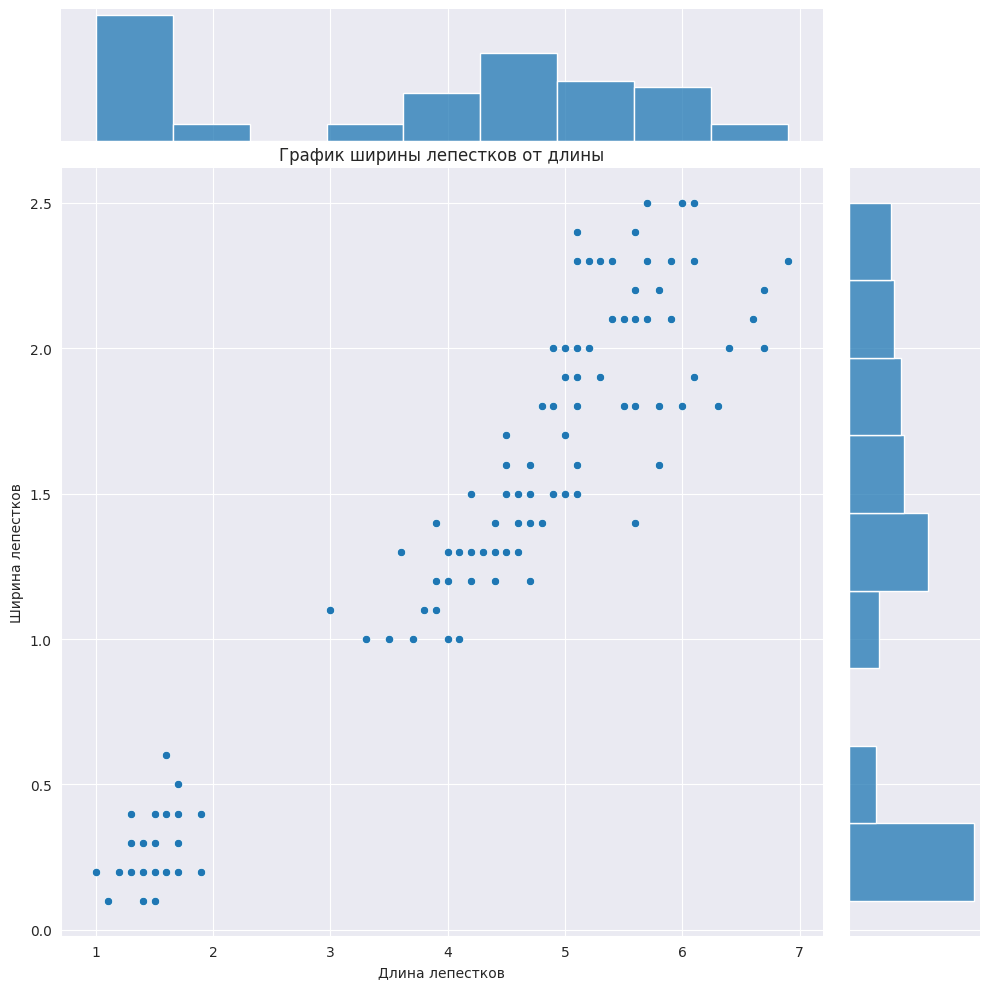

In [41]:
fig = plt.figure(figsize=(12, 8))
sns.jointplot(x = 'PetalLengthCm', y = 'PetalWidthCm', data = iris, height = 10)
plt.xlabel('Длина лепестков')
plt.ylabel('Ширина лепестков')
plt.title('График ширины лепестков от длины')

plt.show()

<Figure size 1200x800 with 0 Axes>

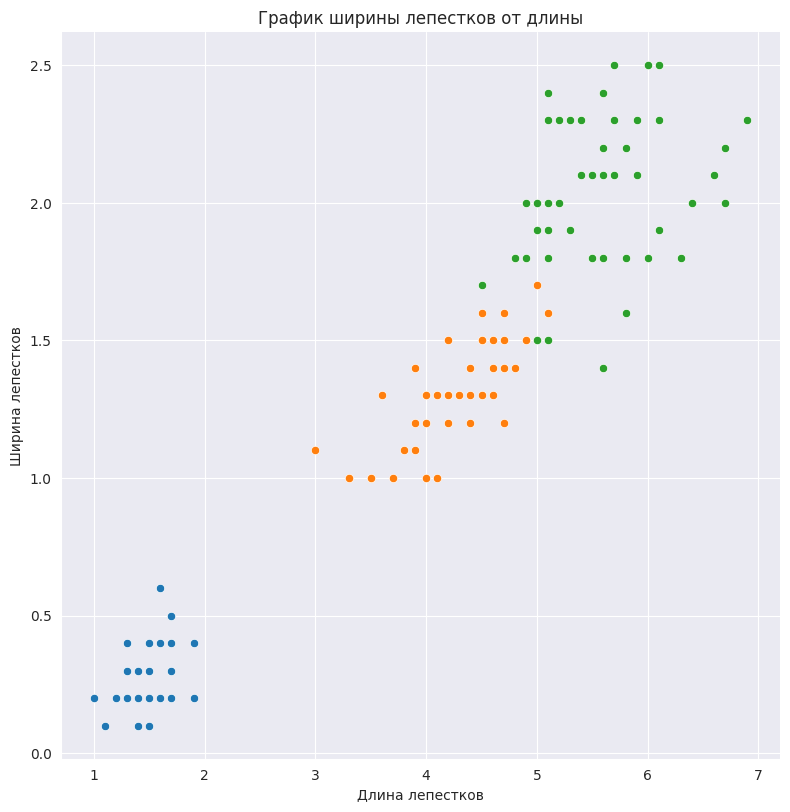

In [38]:
fig = plt.figure(figsize=(12, 8))
graph = sns.FacetGrid(data = iris, hue = 'Species', height = 8)
graph.map(sns.scatterplot, 'PetalLengthCm', 'PetalWidthCm',)
plt.xlabel('Длина лепестков')
plt.ylabel('Ширина лепестков')
plt.title('График ширины лепестков от длины')

plt.show()

Какие выводы можно сделать из этих графиков? Какой из 3 методов - scatterplot, jointplot, facetgrid вам кажется лучше?

<font color='red'> ВАШ ОТВЕТ ЗДЕСЬ </font>

Из вернего графика мы можем еще увидеть распределение, как часто встречаются та или иная длина или та или иная ширина

Из нижнего можно увидеть отличие между разными видами iris и проанализировать как один вид отличается от другого по этим параметрам

Я считаю, что jointplot лучше, потому что в него несложно добавляется отличие по цветам (я сделал это ниже), теперь он тоже отображает распределение по видам, но при этом из него можно извлечь распределение внутри одного вида, что дает дополнительные данные

<Figure size 1200x800 with 0 Axes>

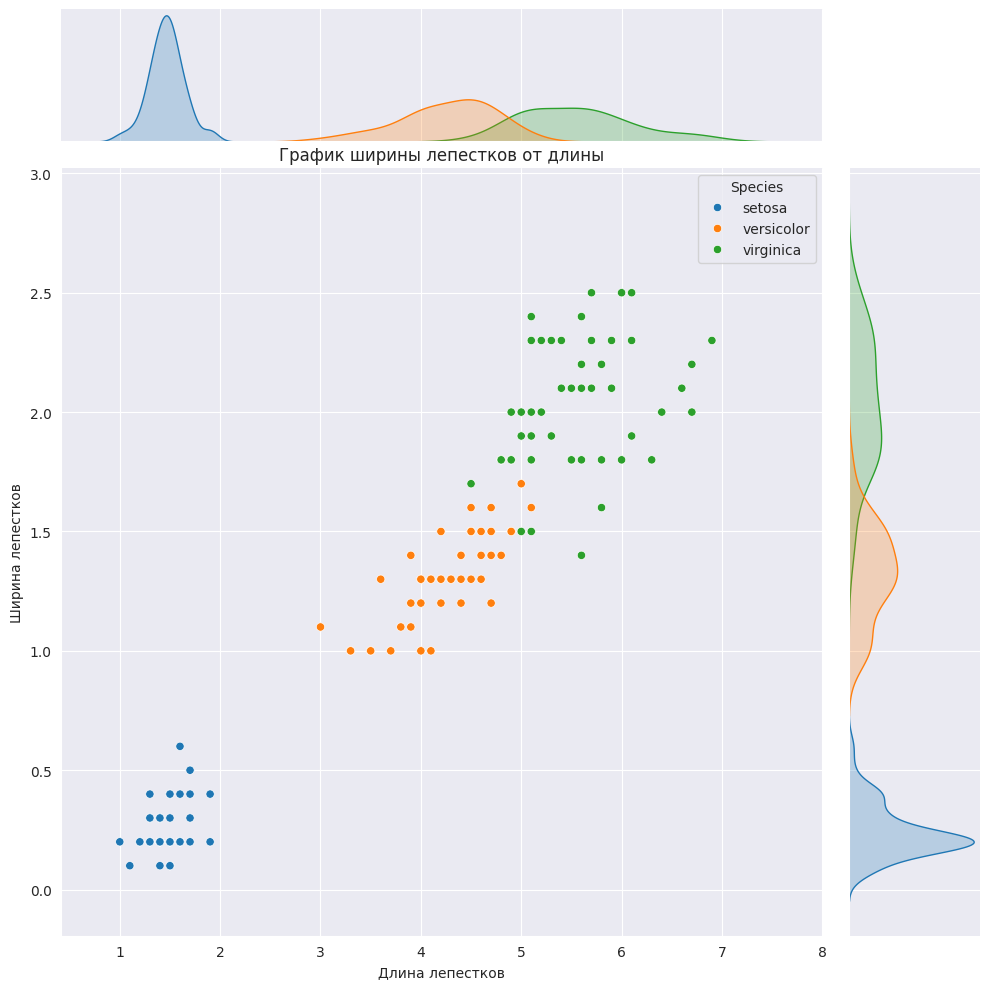

In [40]:
fig = plt.figure(figsize=(12, 8))
sns.jointplot(x = 'PetalLengthCm', y = 'PetalWidthCm', data = iris, height = 10, hue = 'Species')
plt.xlabel('Длина лепестков')
plt.ylabel('Ширина лепестков')
plt.title('График ширины лепестков от длины')

plt.show()

## 3.2 Графики распределений значений длины лепестка

Постройте график "ящика с усами" - `sns.boxplot` и его аналог - `sns.violinplot`. По оси Ox должны находиться возможные виды ирисов, по оси Oy.

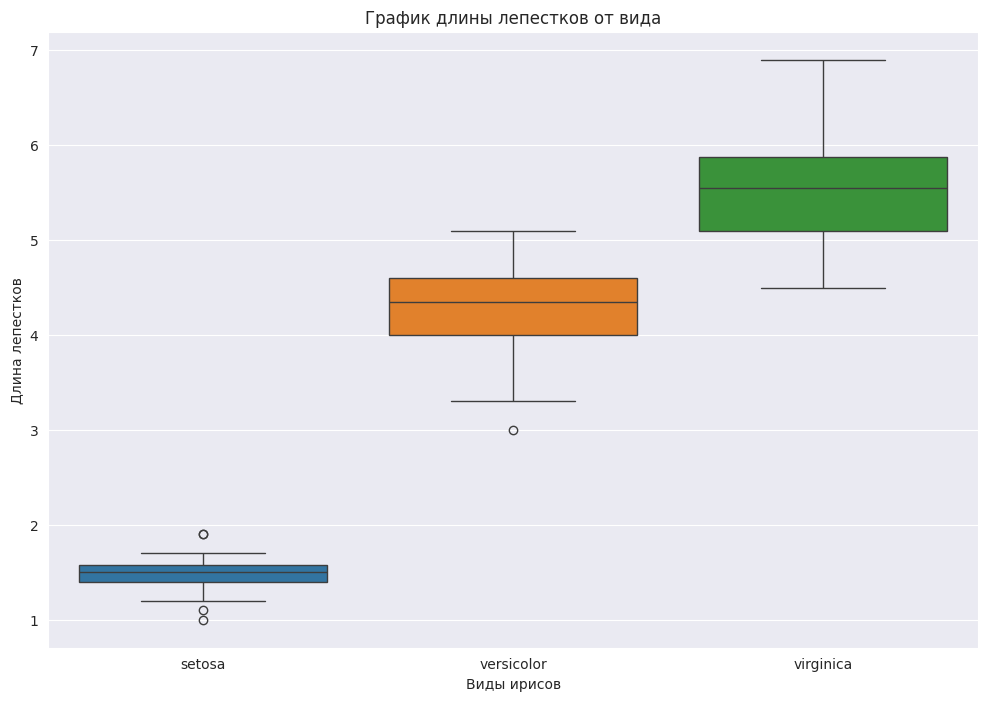

In [46]:
fig = plt.figure(figsize=(12, 8))
sns.boxplot(x = 'Species', y = 'PetalLengthCm', data = iris, hue = 'Species')
plt.xlabel('Виды ирисов')
plt.ylabel('Длина лепестков')
plt.title('График длины лепестков от вида')

plt.show()

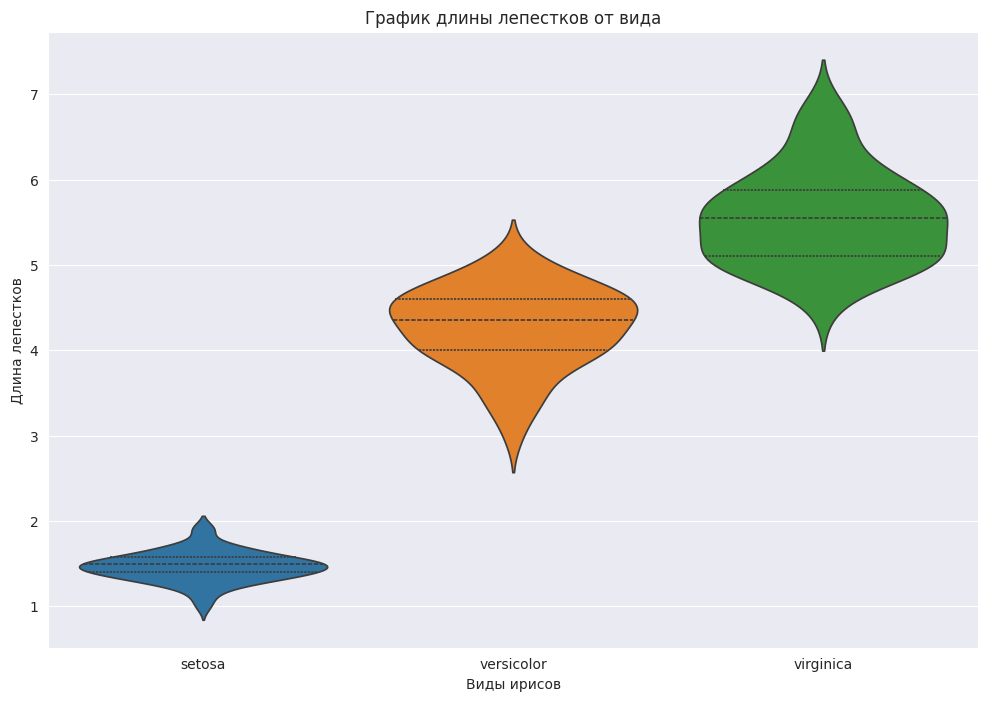

In [49]:
fig = plt.figure(figsize=(12, 8))
sns.violinplot(x = 'Species', y = 'PetalLengthCm', data = iris, hue = 'Species', inner = 'quartile')
plt.xlabel('Виды ирисов')
plt.ylabel('Длина лепестков')
plt.title('График длины лепестков от вида')

plt.show()

Сравните два вида графиков. Какой более информативный, а какой - более красивый визуально по вашему мнению? Какую информацию мы можем получить из этих графиков?

<font color='red'> ВАШ ОТВЕТ ЗДЕСЬ </font>

Более красивым смотрится второй из за нелинейной границы, которая отражает распределение, но первый более информативный, он показывает и выбросы и медианы.
Получить можно как минимум эти же выбросы и учесть это в дальнейшей обработке, также наиболее встречающуюся величину.

## 3.3 Попарные графики взаимосвязи признаков


Давайте попробуем построить большую табличку из графиковв размера 4 на 4, где у нас находятся все возможные пары признаков (длина/ширина лепестка, длина/ширина чашелистика). Для этого воспользуйтесь `sns.pairplot` и не забудьте указать параметр `hue`.

<Figure size 1200x800 with 0 Axes>

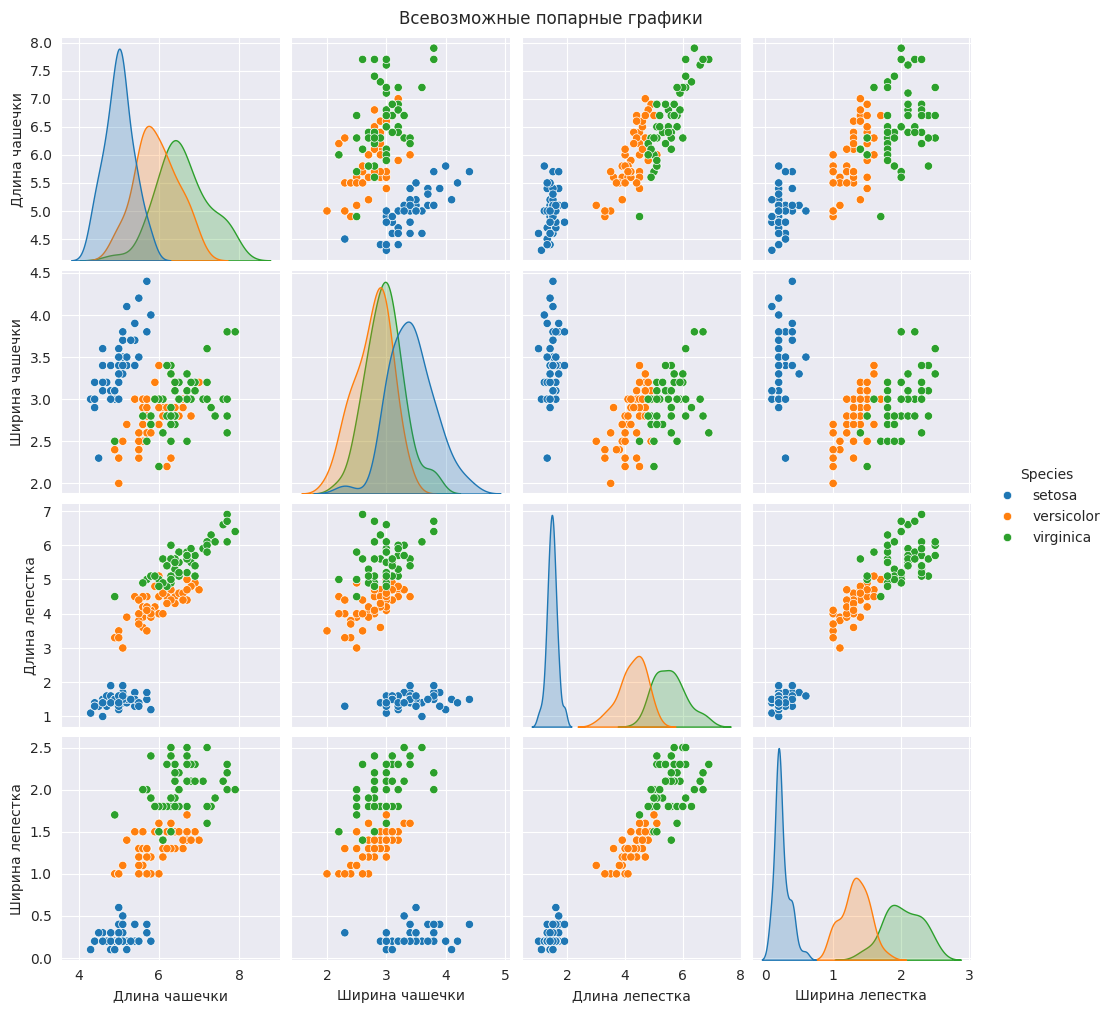

In [60]:
fig = plt.figure(figsize=(12, 8))
iris.rename(columns={'SepalLengthCm': 'Длина чашечки', 'SepalWidthCm': 'Ширина чашечки', 'PetalLengthCm': 'Длина лепестка', 'PetalWidthCm': 'Ширина лепестка'}, inplace=True)
g = sns.pairplot(data=iris, hue="Species")
g.fig.suptitle('Всевозможные попарные графики', y = 1.01)

plt.show()

Какую информацию о взаимосвязи признаков вы можете почерпнуть из полученного графика?

<font color='red'> ВАШ ОТВЕТ ЗДЕСЬ </font>

Мы можем для каждой пары признаков увидеть общий вид их зависимости для каждого вида, также мы можем увидеть какие признаки сильнее, а какие слабее зависят друг от друга, к примеру длина и ширина лепестков зависят друг от друга сильнее, чем длина лепестков и ширина чашечки

Какие графики находятся на диагонали этой таблицы?

<font color='red'> ВАШ ОТВЕТ ЗДЕСЬ </font>

Здесь стоят графики распределения того или иного параметра для каждого вида

Попробуй заменить графики на диагонали таблицы на другие, возможно, более информативные (подсказка: в документации у `sns.pairplot` для этого есть специальный параметр). Выведи полученный график.

<Figure size 1200x800 with 0 Axes>

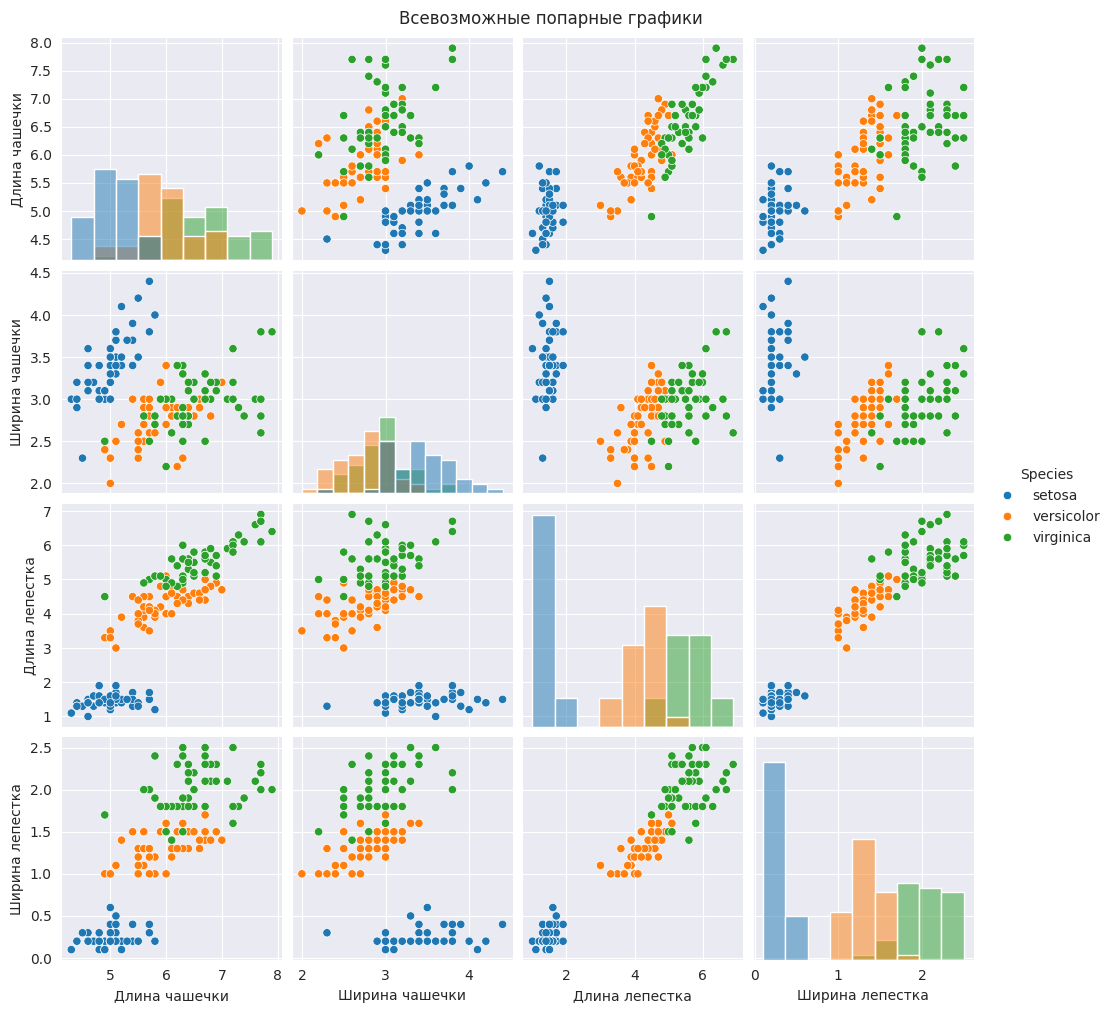

In [66]:
fig = plt.figure(figsize=(12, 8))
iris.rename(columns={'SepalLengthCm': 'Длина чашечки', 'SepalWidthCm': 'Ширина чашечки', 'PetalLengthCm': 'Длина лепестка', 'PetalWidthCm': 'Ширина лепестка'}, inplace=True)
g = sns.pairplot(data=iris, hue="Species", diag_kind = 'hist')
g.fig.suptitle('Всевозможные попарные графики', y = 1.01)

plt.show()

Какие графики теперь находятся на диагонали таблицы? Получилось ли более информативно?

<font color='red'> ВАШ ОТВЕТ ЗДЕСЬ </font>

Теперь там находятся гистограммы, которые по сути отображают тоже самое, но прошлые графики были непрерывные, а гистограммы дискретные